# Exploratory Data Analysis with Pandas

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
df_property = pd.read_csv("./data/property_data.csv")
print("num of rows:", df_property.shape[0])
print("num of cols:", df_property.shape[1])  
df_property

num of rows: 9
num of cols: 7


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [19]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


# Missing Values

In [20]:
df_property[df_property["PID"].isna()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [21]:
df_property.loc[df_property["PID"].isna(), "PID"]

4   NaN
Name: PID, dtype: float64

In [22]:
df_property.loc[df_property["PID"].isna(), "PID"] = 100005000

In [23]:
df_property["PID"] = df_property["PID"].astype("int")

In [24]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,12,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000,213.0,TREMONT,Y,--,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800


In [25]:
# cek OWN_OCCUPIED
df_property["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [28]:
try:
    int("Y")
except ValueError:
    print("Error!")

Error!


In [30]:
for idx, value in enumerate(df_property["OWN_OCCUPIED"]):
    try:
        int(value)
        df_property.loc[idx, "OWN_OCCUPIED"] = np.nan
    except ValueError:
        print(f"Value {value} is fine! continue...")
        continue

Value Y is fine! continue...
Value N is fine! continue...
Value N is fine! continue...
Value Y is fine! continue...
Value Y is fine! continue...
Value nan is fine! continue...
Value Y is fine! continue...
Value Y is fine! continue...


In [31]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,NaN,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000,213.0,TREMONT,Y,--,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800


In [32]:
# cek NUM_BEDROOMS
int("--")

ValueError: invalid literal for int() with base 10: '--'

In [33]:
for row, value in enumerate(df_property["NUM_BEDROOMS"]):
    try:
        int(value)
        print(f"Value {value} is fine! continue...") 
    except ValueError:
        df_property.loc[row, "NUM_BEDROOMS"] = np.nan

Value 3 is fine! continue...
Value 3 is fine! continue...
Value 1 is fine! continue...
Value 3 is fine! continue...
Value 2 is fine! continue...


In [34]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,NaN,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800


In [35]:
# cek NUM_BATH (float)
for row, value in enumerate(df_property["NUM_BATH"]):
    try:
        float(value)
        print(f"Value {value} is fine! continue...") 
    except ValueError:
        df_property.loc[row, "NUM_BATH"] = np.nan

Value 1 is fine! continue...
Value 1.5 is fine! continue...
Value 1 is fine! continue...
Value nan is fine! continue...
Value 2 is fine! continue...
Value 1 is fine! continue...
Value 1 is fine! continue...
Value 2 is fine! continue...


In [36]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,NaN,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800


In [37]:
# cek SQ_FT (float)
for row, value in enumerate(df_property["SQ_FT"]):
    try:
        float(value)
        print(f"Value {value} is fine! continue...") 
    except ValueError:
        df_property.loc[row, "SQ_FT"] = np.nan

Value 1000 is fine! continue...
Value 850 is fine! continue...
Value 700 is fine! continue...
Value 1600 is fine! continue...
Value 800 is fine! continue...
Value 950 is fine! continue...
Value nan is fine! continue...
Value 1800 is fine! continue...


In [38]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,NaN,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800


In [40]:
!pip install xlrd

In [45]:
df_obes = pd.read_excel("./data/obes.xls", sheet_name="7.2", skiprows=4, skipfooter=14)
print("Num of rows:", df_obes.shape[0])
print("Num of cols:", df_obes.shape[1])

Num of rows: 12
Num of cols: 10


In [44]:
df_obes.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [46]:
df_obes.rename(columns={"Unnamed: 0": "Year"})

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [47]:
df_obes.dropna()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [48]:
df_obes.dropna().rename(columns={"Unnamed: 0": "Year"})

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [50]:
df_obes = df_obes.dropna().rename(columns={"Unnamed: 0": "Year"}).set_index("Year")
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [52]:
!pip install matplotlib

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Year'>

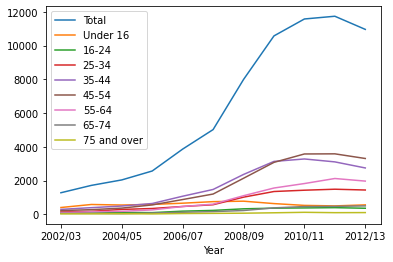

In [53]:
df_obes.plot()

<AxesSubplot:xlabel='Year'>

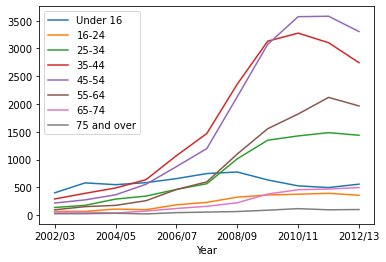

In [55]:
df_obes.drop(columns="Total").plot()

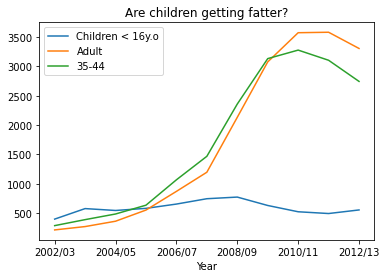

In [61]:
df_obes["Under 16"].plot(label="Children < 16y.o", legend=True)
df_obes["45-54"].plot(label="Adult", legend=True)
df_obes["35-44"].plot(label="35-44", legend=True)
plt.title("Are children getting fatter?")
plt.show()

In [62]:
range(10)

range(0, 10)

In [63]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [64]:
pd.date_range(start="1/12/2020", end="15/12/2020", freq="2H")

DatetimeIndex(['2020-01-12 00:00:00', '2020-01-12 02:00:00',
               '2020-01-12 04:00:00', '2020-01-12 06:00:00',
               '2020-01-12 08:00:00', '2020-01-12 10:00:00',
               '2020-01-12 12:00:00', '2020-01-12 14:00:00',
               '2020-01-12 16:00:00', '2020-01-12 18:00:00',
               ...
               '2020-12-14 06:00:00', '2020-12-14 08:00:00',
               '2020-12-14 10:00:00', '2020-12-14 12:00:00',
               '2020-12-14 14:00:00', '2020-12-14 16:00:00',
               '2020-12-14 18:00:00', '2020-12-14 20:00:00',
               '2020-12-14 22:00:00', '2020-12-15 00:00:00'],
              dtype='datetime64[ns]', length=4057, freq='2H')

In [65]:
pd.date_range(start="1-12-2020", end="15-12-2020", freq="2H")

DatetimeIndex(['2020-01-12 00:00:00', '2020-01-12 02:00:00',
               '2020-01-12 04:00:00', '2020-01-12 06:00:00',
               '2020-01-12 08:00:00', '2020-01-12 10:00:00',
               '2020-01-12 12:00:00', '2020-01-12 14:00:00',
               '2020-01-12 16:00:00', '2020-01-12 18:00:00',
               ...
               '2020-12-14 06:00:00', '2020-12-14 08:00:00',
               '2020-12-14 10:00:00', '2020-12-14 12:00:00',
               '2020-12-14 14:00:00', '2020-12-14 16:00:00',
               '2020-12-14 18:00:00', '2020-12-14 20:00:00',
               '2020-12-14 22:00:00', '2020-12-15 00:00:00'],
              dtype='datetime64[ns]', length=4057, freq='2H')

In [68]:
dates = pd.date_range(start="2020-12-1", end="2020-12-15", freq="2H", tz="Asia/Jakarta")
dates

DatetimeIndex(['2020-12-01 00:00:00+07:00', '2020-12-01 02:00:00+07:00',
               '2020-12-01 04:00:00+07:00', '2020-12-01 06:00:00+07:00',
               '2020-12-01 08:00:00+07:00', '2020-12-01 10:00:00+07:00',
               '2020-12-01 12:00:00+07:00', '2020-12-01 14:00:00+07:00',
               '2020-12-01 16:00:00+07:00', '2020-12-01 18:00:00+07:00',
               ...
               '2020-12-14 06:00:00+07:00', '2020-12-14 08:00:00+07:00',
               '2020-12-14 10:00:00+07:00', '2020-12-14 12:00:00+07:00',
               '2020-12-14 14:00:00+07:00', '2020-12-14 16:00:00+07:00',
               '2020-12-14 18:00:00+07:00', '2020-12-14 20:00:00+07:00',
               '2020-12-14 22:00:00+07:00', '2020-12-15 00:00:00+07:00'],
              dtype='datetime64[ns, Asia/Jakarta]', length=169, freq='2H')

In [69]:
df_dates = pd.DataFrame(dates, columns=["date"])
df_dates

,date
0,2020-12-01 00:00:00+07:00
1,2020-12-01 02:00:00+07:00
2,2020-12-01 04:00:00+07:00
3,2020-12-01 06:00:00+07:00
4,2020-12-01 08:00:00+07:00
...,...
164,2020-12-14 16:00:00+07:00
165,2020-12-14 18:00:00+07:00
166,2020-12-14 20:00:00+07:00
167,2020-12-14 22:00:00+07:00


In [70]:
df_dates["score"] = np.random.randint(100, size=len(df_dates))
df_dates

,date,score
0,2020-12-01 00:00:00+07:00,18
1,2020-12-01 02:00:00+07:00,33
2,2020-12-01 04:00:00+07:00,81
3,2020-12-01 06:00:00+07:00,13
4,2020-12-01 08:00:00+07:00,66
...,...,...
164,2020-12-14 16:00:00+07:00,11
165,2020-12-14 18:00:00+07:00,42
166,2020-12-14 20:00:00+07:00,15
167,2020-12-14 22:00:00+07:00,83


In [71]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   date    169 non-null    datetime64[ns, Asia/Jakarta]
 1   score   169 non-null    int32                       
dtypes: datetime64[ns, Asia/Jakarta](1), int32(1)
memory usage: 2.1 KB


In [80]:
df_dates = df_dates.rename(columns={"date": "datetime"}).set_index("datetime")

In [81]:
df_dates.head()

,score
datetime,
2020-12-01 00:00:00+07:00,18
2020-12-01 02:00:00+07:00,33
2020-12-01 04:00:00+07:00,81
2020-12-01 06:00:00+07:00,13
2020-12-01 08:00:00+07:00,66


In [82]:
df_dates.index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Tuesday'],
      dtype='object', name='datetime', length=169)

In [84]:
df_dates[(df_dates.index.hour == 6) & (df_dates.index.day_name() == "Sunday")]

,score
datetime,
2020-12-06 06:00:00+07:00,96
2020-12-13 06:00:00+07:00,86


In [85]:
df_dates["2020/12/1" : "2020/12/7"]

,score
datetime,
2020-12-01 00:00:00+07:00,18
2020-12-01 02:00:00+07:00,33
2020-12-01 04:00:00+07:00,81
2020-12-01 06:00:00+07:00,13
2020-12-01 08:00:00+07:00,66
...,...
2020-12-07 14:00:00+07:00,89
2020-12-07 16:00:00+07:00,81
2020-12-07 18:00:00+07:00,26


In [86]:
df_dates.resample("D").mean()

,score
datetime,
2020-12-01 00:00:00+07:00,45.583333
2020-12-02 00:00:00+07:00,60.000000
2020-12-03 00:00:00+07:00,62.750000
2020-12-04 00:00:00+07:00,50.583333
2020-12-05 00:00:00+07:00,58.333333
2020-12-06 00:00:00+07:00,47.666667
2020-12-07 00:00:00+07:00,59.583333
2020-12-08 00:00:00+07:00,53.500000
2020-12-09 00:00:00+07:00,28.083333


In [87]:
df_dates.resample("H").mean()

,score
datetime,
2020-12-01 00:00:00+07:00,18.0
2020-12-01 01:00:00+07:00,NaN
2020-12-01 02:00:00+07:00,33.0
2020-12-01 03:00:00+07:00,NaN
2020-12-01 04:00:00+07:00,81.0
...,...
2020-12-14 20:00:00+07:00,15.0
2020-12-14 21:00:00+07:00,NaN
2020-12-14 22:00:00+07:00,83.0


In [88]:
df_dates.resample("2H").mean()

,score
datetime,
2020-12-01 00:00:00+07:00,18
2020-12-01 02:00:00+07:00,33
2020-12-01 04:00:00+07:00,81
2020-12-01 06:00:00+07:00,13
2020-12-01 08:00:00+07:00,66
...,...
2020-12-14 16:00:00+07:00,11
2020-12-14 18:00:00+07:00,42
2020-12-14 20:00:00+07:00,15


In [89]:
df_dates.resample("6H").mean()

,score
datetime,
2020-12-01 00:00:00+07:00,44.000000
2020-12-01 06:00:00+07:00,39.666667
2020-12-01 12:00:00+07:00,49.666667
2020-12-01 18:00:00+07:00,49.000000
2020-12-02 00:00:00+07:00,67.000000
2020-12-02 06:00:00+07:00,79.333333
2020-12-02 12:00:00+07:00,49.666667
2020-12-02 18:00:00+07:00,44.000000
2020-12-03 00:00:00+07:00,41.666667


In [90]:
df_dates.resample("7D").mean()

,score
datetime,
2020-12-01 00:00:00+07:00,54.928571
2020-12-08 00:00:00+07:00,49.392857
2020-12-15 00:00:00+07:00,35.000000


In [91]:
df_dates.rolling(2).sum()

,score
datetime,
2020-12-01 00:00:00+07:00,NaN
2020-12-01 02:00:00+07:00,51.0
2020-12-01 04:00:00+07:00,114.0
2020-12-01 06:00:00+07:00,94.0
2020-12-01 08:00:00+07:00,79.0
...,...
2020-12-14 16:00:00+07:00,46.0
2020-12-14 18:00:00+07:00,53.0
2020-12-14 20:00:00+07:00,57.0


In [92]:
df_dates.rolling(4).sum()

,score
datetime,
2020-12-01 00:00:00+07:00,NaN
2020-12-01 02:00:00+07:00,NaN
2020-12-01 04:00:00+07:00,NaN
2020-12-01 06:00:00+07:00,145.0
2020-12-01 08:00:00+07:00,193.0
...,...
2020-12-14 16:00:00+07:00,192.0
2020-12-14 18:00:00+07:00,138.0
2020-12-14 20:00:00+07:00,103.0


In [96]:
df_dates["rolling_sum"] = df_dates.rolling(4).sum()
df_dates.head()

,score,rolling_sum
datetime,,
2020-12-01 00:00:00+07:00,18,NaN
2020-12-01 02:00:00+07:00,33,NaN
2020-12-01 04:00:00+07:00,81,NaN
2020-12-01 06:00:00+07:00,13,145.0
2020-12-01 08:00:00+07:00,66,193.0


In [94]:
df_dates["rolling_sum"].fillna(145)

datetime
2020-12-01 00:00:00+07:00    145.0
2020-12-01 02:00:00+07:00    145.0
2020-12-01 04:00:00+07:00    145.0
2020-12-01 06:00:00+07:00    145.0
2020-12-01 08:00:00+07:00    193.0
                             ...  
2020-12-14 16:00:00+07:00    192.0
2020-12-14 18:00:00+07:00    138.0
2020-12-14 20:00:00+07:00    103.0
2020-12-14 22:00:00+07:00    151.0
2020-12-15 00:00:00+07:00    175.0
Freq: 2H, Name: rolling_sum, Length: 169, dtype: float64

In [98]:
df_dates["rolling_sum"] = df_dates.rolling(5).sum().fillna(method="backfill")
df_dates

,score,rolling_sum
datetime,,
2020-12-01 00:00:00+07:00,18,211.0
2020-12-01 02:00:00+07:00,33,211.0
2020-12-01 04:00:00+07:00,81,211.0
2020-12-01 06:00:00+07:00,13,211.0
2020-12-01 08:00:00+07:00,66,211.0
...,...,...
2020-12-14 16:00:00+07:00,11,240.0
2020-12-14 18:00:00+07:00,42,234.0
2020-12-14 20:00:00+07:00,15,153.0


In [104]:
df_opsd = pd.read_csv("./data/opsd_germany_daily.csv")
print("Num of rows:", df_opsd.shape[0])
print("Num of rows:", df_opsd.shape[0])
display(df_opsd.head())
display(df_opsd.tail())

Num of rows: 4383
Num of rows: 4383


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [105]:
df_opsd["Date"] = pd.to_datetime(df_opsd["Date"])
df_opsd

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [106]:
df_opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [107]:
df_opsd = df_opsd.set_index("Date")
df_opsd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [108]:
df_opsd.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [109]:
df_opsd["year"] = df_opsd.index.year
df_opsd["month"] = df_opsd.index.month_name()
df_opsd["dayname"] = df_opsd.index.day_name()
df_opsd

,Consumption,Wind,Solar,Wind+Solar,year,month,dayname
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,January,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,January,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,January,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,January,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,January,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,December,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,December,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,December,Friday


In [110]:
df_opsd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   year         4383 non-null   int64  
 5   month        4383 non-null   object 
 6   dayname      4383 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 273.9+ KB


In [112]:
# df_opsd.loc[df_opsd.index.dayofweek == 0]
df_opsd.loc[df_opsd.dayname == "Monday"]

,Consumption,Wind,Solar,Wind+Solar,year,month,dayname
Date,,,,,,,
2006-01-02,1380.52100,NaN,NaN,NaN,2006,January,Monday
2006-01-09,1529.32300,NaN,NaN,NaN,2006,January,Monday
2006-01-16,1563.73800,NaN,NaN,NaN,2006,January,Monday
2006-01-23,1569.69100,NaN,NaN,NaN,2006,January,Monday
2006-01-30,1554.72200,NaN,NaN,NaN,2006,January,Monday
...,...,...,...,...,...,...,...
2017-11-27,1602.17797,743.280,21.983,765.263,2017,November,Monday
2017-12-04,1620.97758,479.798,10.747,490.545,2017,December,Monday
2017-12-11,1614.15862,415.109,5.669,420.778,2017,December,Monday


In [113]:
set_years = set(df_opsd.index.year)
print("Range of the year:", len(set_years), set_years)

Range of the year: 12 {2016, 2017, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [116]:
df_opsd.groupby("year").mean()

,Consumption,Wind,Solar,Wind+Solar
year,,,,
2006,1339.913797,NaN,NaN,NaN
2007,1360.635197,NaN,NaN,NaN
2008,1354.018787,NaN,NaN,NaN
2009,1259.554597,NaN,NaN,NaN
2010,1338.599178,98.388430,NaN,NaN
2011,1328.257770,120.969646,NaN,NaN
2012,1282.991131,125.307833,76.194896,201.502730
2013,1269.416036,129.309129,81.431901,211.287722
2014,1381.273482,140.405692,89.527017,230.305254


In [119]:
monthly_avg_opsd = df_opsd.groupby(["year", "month"])[["Consumption", "Wind", "Solar"]].mean()
monthly_avg_opsd

Consumption        Wind       Solar
year month                                         
2006 April      1275.058900         NaN         NaN
     August     1241.188774         NaN         NaN
     December   1385.686355         NaN         NaN
     February   1467.106893         NaN         NaN
     January    1461.442065         NaN         NaN
...                     ...         ...         ...
2017 March      1422.456871  299.807516  104.216677
     May        1323.081097  182.150516  165.172774
     November   1477.990818  341.966700   27.701467
     October    1366.297385  402.583774   68.727645
     September  1335.952031  209.591000  102.643033

[144 rows x 3 columns]

In [121]:
monthly_avg_opsd.index.names

FrozenList(['year', 'month'])

In [122]:
monthly_avg_opsd.loc[
    ([2006, 2007], ["January", "February"]),
    ["Consumption", "Wind", "Solar"]
]

Consumption  Wind  Solar
year month                             
2006 January   1461.442065   NaN    NaN
     February  1467.106893   NaN    NaN
2007 January   1467.058032   NaN    NaN
     February  1434.484357   NaN    NaN

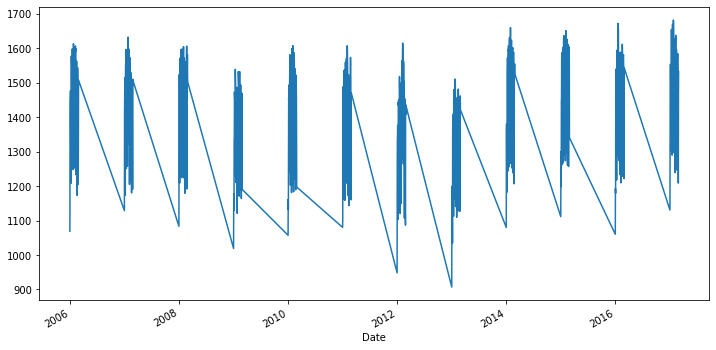

In [126]:
plt.figure(figsize=(12, 6))
df_opsd.loc[df_opsd.index.month < 3, "Consumption"].plot()
plt.show()

In [ ]:
# len(), print(), np.random.randint(), int(), str(), float(), plt.show() -> function
# df_opsd.mean() -> method

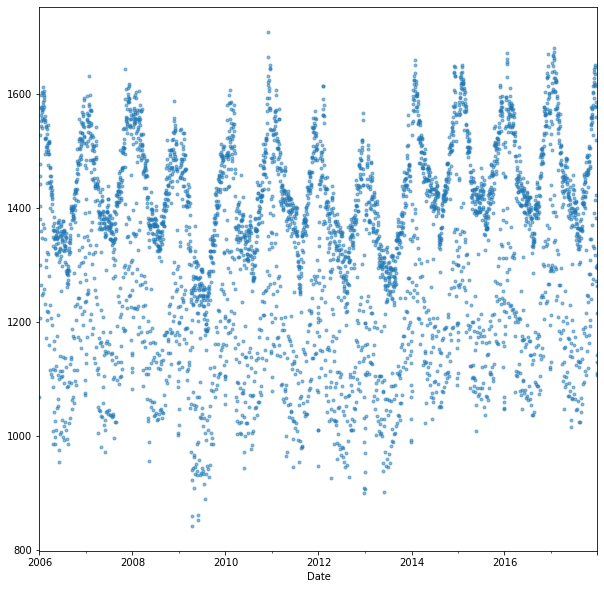

In [131]:
plt.figure(figsize=(10, 10))
df_opsd["Consumption"].plot(marker=".", alpha=.5, linestyle="None")
plt.show()

<AxesSubplot:>

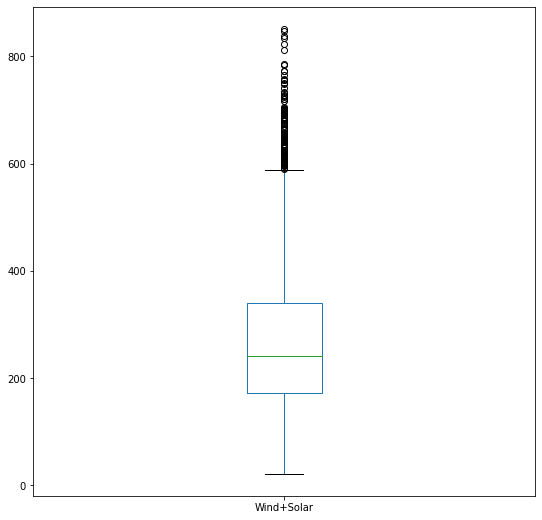

In [132]:
df_opsd["Wind+Solar"].plot(kind="box", figsize=(9, 9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='month'>

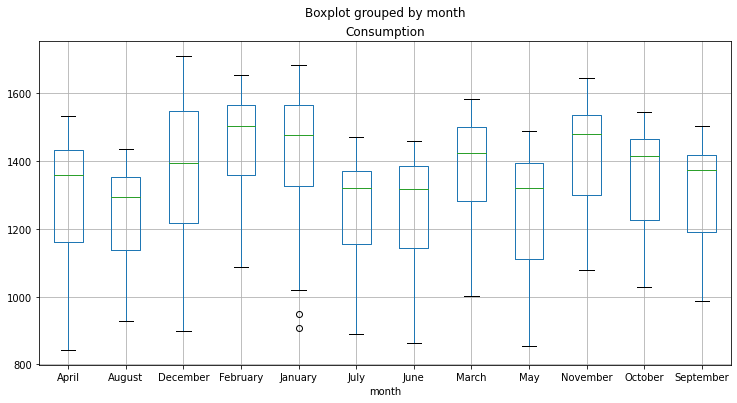

In [135]:
df_opsd.boxplot("Consumption", by="month", figsize=(12, 6))

<AxesSubplot:title={'center':'Consumption'}, xlabel='dayname'>

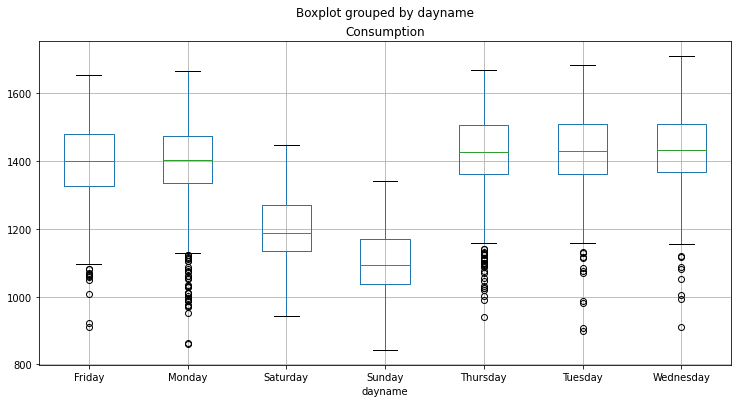

In [136]:
df_opsd.boxplot("Consumption", by="dayname", figsize=(12, 6))

# User Behavior Data